# New movielens dataset: 610 users and 943 movies, 100836 ratings

In [1]:
import pandas as  pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df_ratings=pd.read_csv('ratings.csv')
movie_titles=pd.read_csv('movies.csv')

In [3]:
df = pd.merge(df_ratings, movie_titles, on='movieId')
df.head()

userId  movieId  rating   timestamp             title  \
0       1        1     4.0   964982703  Toy Story (1995)   
1       5        1     4.0   847434962  Toy Story (1995)   
2       7        1     4.5  1106635946  Toy Story (1995)   
3      15        1     2.5  1510577970  Toy Story (1995)   
4      17        1     4.5  1305696483  Toy Story (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1  Adventure|Animation|Children|Comedy|Fantasy  
2  Adventure|Animation|Children|Comedy|Fantasy  
3  Adventure|Animation|Children|Comedy|Fantasy  
4  Adventure|Animation|Children|Comedy|Fantasy

In [4]:
#ratings_df là DataFrame gồm 2 cột title và rating
ratings_df = pd.DataFrame(df.groupby('movieId')['rating'].mean())
ratings_df.head()

rating
movieId          
1        3.920930
2        3.431818
3        3.259615
4        2.357143
5        3.071429

In [5]:
#Thêm số lượng ratings
ratings_df['num_of_ratings'] = pd.DataFrame(df.groupby('movieId')['rating'].count())
ratings_df.head()

rating  num_of_ratings
movieId                          
1        3.920930             215
2        3.431818             110
3        3.259615              52
4        2.357143               7
5        3.071429              49

In [6]:
#Đổi tên cột
ratings_df.rename(columns={'rating': 'average_rating'}, inplace=True)
ratings_df.head(3)

average_rating  num_of_ratings
movieId                                
1              3.920930             215
2              3.431818             110
3              3.259615              52

In [7]:
#Thêm số lượng ratings
ratings_df['num_of_ratings'] = pd.DataFrame(df.groupby('movieId')['rating'].count())
ratings_df.head()

average_rating  num_of_ratings
movieId                                
1              3.920930             215
2              3.431818             110
3              3.259615              52
4              2.357143               7
5              3.071429              49

In [8]:
df.head()

userId  movieId  rating   timestamp             title  \
0       1        1     4.0   964982703  Toy Story (1995)   
1       5        1     4.0   847434962  Toy Story (1995)   
2       7        1     4.5  1106635946  Toy Story (1995)   
3      15        1     2.5  1510577970  Toy Story (1995)   
4      17        1     4.5  1305696483  Toy Story (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1  Adventure|Animation|Children|Comedy|Fantasy  
2  Adventure|Animation|Children|Comedy|Fantasy  
3  Adventure|Animation|Children|Comedy|Fantasy  
4  Adventure|Animation|Children|Comedy|Fantasy

In [9]:
user_movie_matrix = df.pivot_table(values='rating' , index='userId' , columns='movieId' )
user_movie_matrix.head()

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     NaN     4.0     NaN     NaN     4.0     NaN     NaN   
2           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5           4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  9       10      ...  193565  193567  193571  193573  193579  193581  \
userId                   ...                                                   
1           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
5           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  193583  193585  193587  193609  
userId                                   
1           NaN     NaN     NaN     NaN  
2           NaN     NaN     NaN     NaN  
3           NaN     NaN     NaN     NaN  
4           NaN     NaN     NaN     NaN  
5           NaN     NaN     NaN     NaN  

[5 rows x 9724 columns]

In [10]:
ratings_df.sort_values(by='num_of_ratings', ascending=False).head()

average_rating  num_of_ratings
movieId                                
356            4.164134             329
318            4.429022             317
296            4.197068             307
593            4.161290             279
2571           4.192446             278

In [11]:
df=pd.read_csv('interaction_main.csv')

dic_nber_cate={2: 'Adventure',
 0: 'Animation',
 19: 'Children',
 5: 'Comedy',
 11: 'Fantasy',
 4: 'Romance',
 1: 'Action',
 6: 'Crime',
 13: 'Thriller',
 16: 'Mystery',
 8: 'Horror',
 3: 'Drama',
 7: 'War',
 10: 'Western',
 14: 'Sci-Fi',
 15: 'Musical',
 18: 'Film-Noir',
 9: 'IMAX',
 12: 'Documentary'}

In [13]:
df_7h58=pd.read_csv('interaction_main.csv')
df_7h58

userId  movieId  rating             genres
0            1        1     4.0  [2, 0, 19, 5, 11]
1            5        1     4.0  [2, 0, 19, 5, 11]
2            7        1     4.5  [2, 0, 19, 5, 11]
3           15        1     2.5  [2, 0, 19, 5, 11]
4           17        1     4.5  [2, 0, 19, 5, 11]
...        ...      ...     ...                ...
100831     610   160341     2.5            [1, 13]
100832     610   160527     4.5          [1, 6, 3]
100833     610   160836     3.0         [1, 3, 13]
100834     610   163937     3.5            [8, 13]
100835     610   163981     3.5                [8]

[100836 rows x 4 columns]

In [22]:
df_7h58.movieId.value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
5986        1
100304      1
34800       1
83976       1
8196        1
Name: movieId, Length: 9724, dtype: int64

In [14]:
dct_ratings_user=dict(df_7h58['userId'].value_counts())

In [15]:
def str_lst_to_lst(str_lst):
    lst1=str_lst[1:-1].split(',')
    lst2=lst1[:]
    return [int(i) for i in lst2]

In [16]:
df_check_clustering=pd.read_csv('embedding_vector_user_addition_equation.csv')

In [17]:
lst_user_id_cluster=df_check_clustering.pop('userId')
lst_user=list(lst_user_id_cluster)
lst_vector=df_check_clustering.values.tolist()
import numpy as np
matrix_user=np.array(df_check_clustering.values.tolist())
df_check_clustering.dropna(inplace=True)

In [20]:
matrix_user.shape

(610, 20)

In [132]:
def Information_clustering2(number_clus,lst_label):#lst_user, lst_vector là KHÔNG BAO GIỜ THAY ĐỔI
    index_clus=[index for index, value in enumerate(lst_label) if value == number_clus]
    b=[lst_user[i] for i in index_clus]
    arr=[lst_vector[i] for i in index_clus]
    #print("number of users of cluster "+str(number_clus)+ ": ",len(b))
    #print("\nstd of each genres of cluster "+str(number_clus)+":\n", np.std(arr, axis = 0)) 
    #print("\nmean of each genresof cluster "+str(number_clus)+":\n", np.mean(arr, axis = 0))
    lst_mean=list(np.mean(arr, axis = 0))
    lst_std=list(np.std(arr, axis = 0))
    lst_like=[index for index, value in enumerate(lst_mean) if value >= 7]
    lst_unlike=[index for index, value in enumerate(lst_mean) if value <= 3]
    #print("list genres seem like:",lst_like)
    #print("list genres seem not like:",lst_unlike)
    dct_std={lst_mean[i]:lst_std[i] for i in range(len(lst_mean))}
    lst_mean_sorted=sorted(lst_mean)
    lst_top=lst_mean_sorted[-3:]
    lst_like=[lst_mean.index(i) for i in lst_top]
    lst_std_top=[dct_std[i] for i in lst_top]
    avg_like=sum(lst_top)/3
    x = np.array([i for i in range(20)])
    y = np.mean(arr, axis = 0)
    colors = np.random.rand(20)
    #plt.scatter(x, y, s=300*np.std(arr, axis = 0), c=colors, alpha=0.4)
    #plt.title('20 genres of cluster '+str(number_clus))
    #plt.show()
    r=np.std(arr, axis = 0)
    draw_right_r(x,y,r,number_clus,lst_like,lst_unlike,len(index_clus))
    return len(b),avg_like,lst_like,lst_unlike,index_clus#index_clus chính là index trong lst_id_user những th thuộc cluster này

In [39]:
def Information_clustering(number_clus,lst_label):#lst_user, lst_vector là KHÔNG BAO GIỜ THAY ĐỔI
    index_clus=[index for index, value in enumerate(lst_label) if value == number_clus]
    b=[lst_user[i] for i in index_clus]
    arr=[lst_vector[i] for i in index_clus]
    #print("number of users of cluster "+str(number_clus)+ ": ",len(b))
    #print("\nstd of each genres of cluster "+str(number_clus)+":\n", np.std(arr, axis = 0)) 
    #print("\nmean of each genresof cluster "+str(number_clus)+":\n", np.mean(arr, axis = 0))
    lst_mean=list(np.mean(arr, axis = 0))
    lst_std=list(np.std(arr, axis = 0))
    lst_like=[index for index, value in enumerate(lst_mean) if value >= 7]
    lst_unlike=[index for index, value in enumerate(lst_mean) if value <= 3]
    #print("list genres seem like:",lst_like)
    #print("list genres seem not like:",lst_unlike)
    dct_std={lst_mean[i]:lst_std[i] for i in range(len(lst_mean))}
    lst_mean_sorted=sorted(lst_mean)
    lst_top=lst_mean_sorted[-4:]
    lst_like=[lst_mean.index(i) for i in lst_top]
    lst_std_top=[dct_std[i] for i in lst_top]
    avg_like=sum(lst_top)/4
    x = np.array([i for i in range(20)])
    y = np.mean(arr, axis = 0)
    colors = np.random.rand(20)
    #plt.scatter(x, y, s=300*np.std(arr, axis = 0), c=colors, alpha=0.4)
    #plt.title('20 genres of cluster '+str(number_clus))
    #plt.show()
    r=np.std(arr, axis = 0)
    draw_right_r(x,y,r,number_clus,lst_like,lst_unlike,len(index_clus))
    return len(b),avg_like,lst_like,lst_unlike,index_clus#index_clus chính là index trong lst_id_user những th thuộc cluster này

In [13]:
def information_clustering(number_clus,lst_label):#lst_user, lst_vector là KHÔNG BAO GIỜ THAY ĐỔI
    index_clus=[index for index, value in enumerate(lst_label) if value == number_clus]
    b=[lst_user[i] for i in index_clus]
    arr=[lst_vector[i] for i in index_clus]
    #print("number of users of cluster "+str(number_clus)+ ": ",len(b))
    #print("\nstd of each genres of cluster "+str(number_clus)+":\n", np.std(arr, axis = 0)) 
    #print("\nmean of each genresof cluster "+str(number_clus)+":\n", np.mean(arr, axis = 0))
    lst_mean=list(np.mean(arr, axis = 0))
    lst_std=list(np.std(arr, axis = 0))
    lst_like=[index for index, value in enumerate(lst_mean) if value >= 7]
    lst_unlike=[index for index, value in enumerate(lst_mean) if value <= 3]
    #print("list genres seem like:",lst_like)
    #print("list genres seem not like:",lst_unlike)
    dct_std={lst_mean[i]:lst_std[i] for i in range(len(lst_mean))}
    lst_mean_sorted=sorted(lst_mean)
    lst_top=lst_mean_sorted[-3:]
    lst_std_top=[dct_std[i] for i in lst_top]
    avg=sum(lst_std_top)/3
    x = np.array([i for i in range(20)])
    y = np.mean(arr, axis = 0)
    colors = np.random.rand(20)
    #plt.scatter(x, y, s=300*np.std(arr, axis = 0), c=colors, alpha=0.4)
    #plt.title('20 genres of cluster '+str(number_clus))
    #plt.show()
    r=np.std(arr, axis = 0)
    draw_right_r(x,y,r,number_clus,lst_like,lst_unlike,len(index_clus))
    return len(b),avg,lst_like,lst_unlike,index_clus#index_clus chính là index trong lst_id_user những th thuộc cluster này

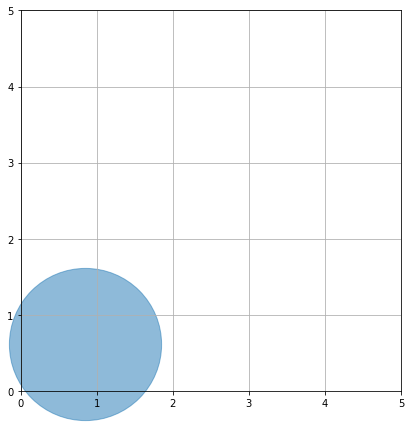

In [10]:
import numpy as np
import matplotlib.pyplot as plt

plt.close('all')

# Generate some data :
N = 1
x = np.random.rand(N) + 0.5
y = np.random.rand(N) + 0.5
#r = np.random.rand(N)/10
r=np.array([1])
# Plot the data :
fig = plt.figure(facecolor='white', figsize=(7, 7))
ax = fig.add_subplot(111, aspect='equal')
ax.grid(True)
scat = ax.scatter(x, y, s=0, alpha=0.5, clip_on=False)
ax.axis([0, 5, 0, 5])

# Draw figure :
fig.canvas.draw()

# Calculate radius in pixels :
rr_pix = (ax.transData.transform(np.vstack([r, r]).T) -
          ax.transData.transform(np.vstack([np.zeros(N), np.zeros(N)]).T))
rpix, _ = rr_pix.T

# Calculate and update size in points:
size_pt = (2*rpix/fig.dpi*72)**2
scat.set_sizes(size_pt)

# Save and show figure:
fig.savefig('scatter_size_axes.png')
plt.show()

def draw_right_r(x,y,r,nber_clus,lst_like,lst_unlike,az):
    fig = plt.figure(facecolor='white', figsize=(7, 7))
    ax = fig.add_subplot(111, aspect='equal')
    ax.grid(True)
    #colors = np.random.rand(len(list(x)))
    colors=['r','b','g','y','r','b','g','y','r','b','g','y','r','b','g','y','r','b','g','y']
    scat = ax.scatter(x, y, s=0, alpha=0.5, clip_on=False,c=colors)
    ax.axis([0, 20, 0, 10])
    
# Draw figure :
    fig.canvas.draw()

# Calculate radius in pixels :
    rr_pix = (ax.transData.transform(np.vstack([r, r]).T) -
          ax.transData.transform(np.vstack([np.zeros(N), np.zeros(N)]).T))
    rpix, _ = rr_pix.T

# Calculate and update size in points:
    size_pt = (2*rpix/fig.dpi*72)**2
    scat.set_sizes(size_pt)
    
    
    
    plt.scatter(x,y,s = 24, color = 'k')
    plt.xticks([i for i in range(20)],fontsize=10 )
    plt.yticks([i for i in range(10)],fontsize=10 )
# Save and show figure:
    plt.title('Cluster '+ str(nber_clus) +"- Like:" + str(lst_like) + " - unlike: " + str(lst_unlike) +" - number of users: " + str(az) +"~"+str(round(az/610*100,2))+"%")
    name='Cluster_'+ str(nber_clus)+'.png'
    plt.savefig(name)
    plt.show()


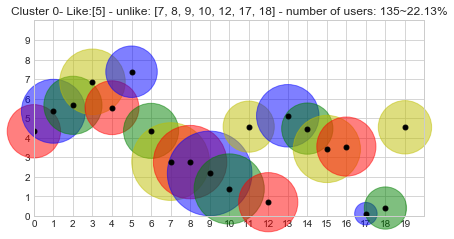

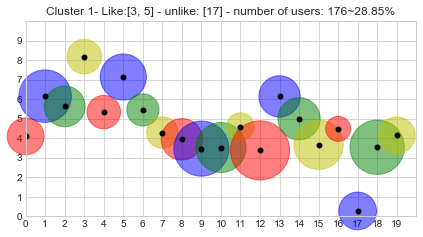

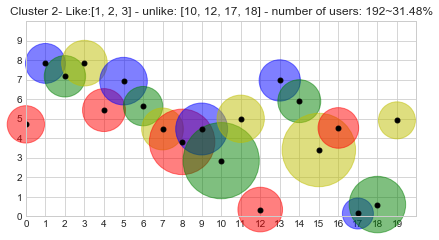

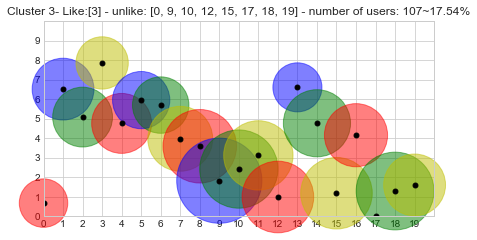

In [14]:
plt.style.use('seaborn-whitegrid')
nber_clus=4
kmeans = KMeans(n_clusters=nber_clus, random_state=0).fit(matrix_user)
lst_label=list(kmeans.labels_)
lst_nber_users=[]
lst_avg=[]
for i in range(nber_clus):
    nber_users,avg,lst_like,lst_unlike,total_user_clus=information_clustering(i,lst_label)#de show thong tin tung cum thi la ham information_clustering()
    lst_nber_users.append(nber_users)
    lst_avg.append(avg)
#print("Object function (need to minimize): ",np.sum(np.array(lst_nber_users)*np.array(lst_avg)))

In [16]:
centroids = kmeans.cluster_centers_
lst_centroids=[list(list(centroids)[i]) for i in range(len(centroids))]

<Figure size 432x288 with 0 Axes>

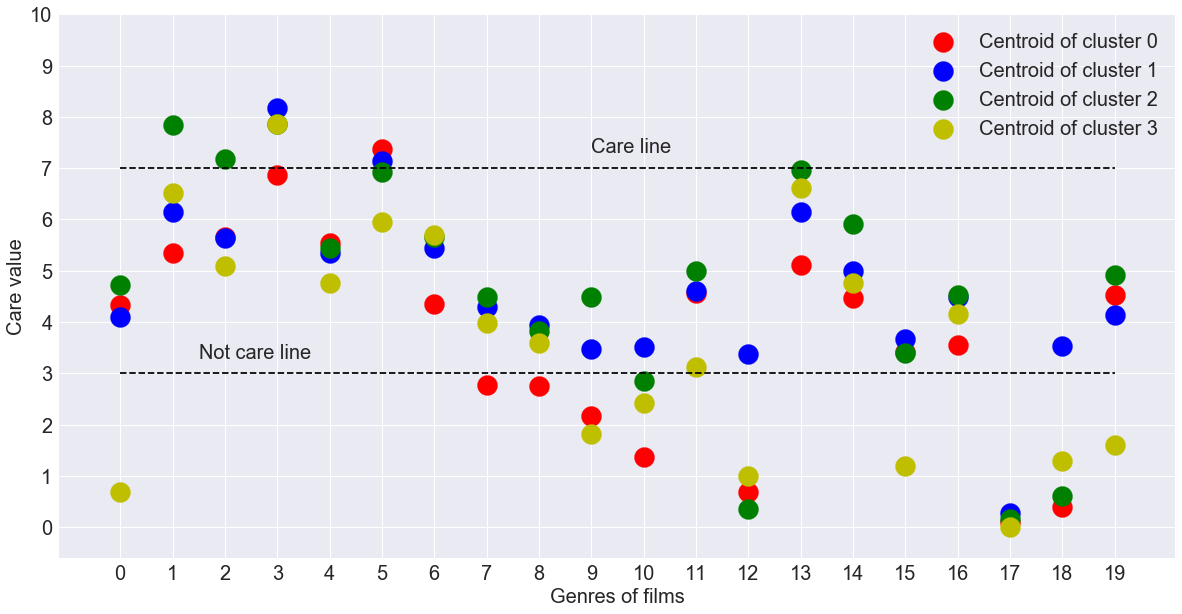

In [17]:
plt.clf()
plt.style.use('seaborn')

plt.figure(figsize=[20,10])
colors_centroid=['r','b','g','y']
for i in range(len(centroids)):
    plt.scatter([i for i in range(20)],lst_centroids[i],label='Centroid of cluster '+str(i),color=colors_centroid[i],s=400)

plt.plot([i for i in range(20)],[7 for i in range(20)],'--',c='k')
plt.plot([i for i in range(20)],[3 for i in range(20)],'--',c='k')
plt.xlabel('Genres of films',fontsize=20)
plt.ylabel('Care value',fontsize=20)
plt.yticks([i for i in range(11)],fontsize=20 )
plt.xticks([i for i in range(20)],fontsize=20 )
plt.text(1.5,3.3,'Not care line',size=20)
plt.text(9,7.3,'Care line',size=20)
plt.legend(loc=1, prop={'size': 20})

plt.show()
#plt.savefig("centroid.png")

In [19]:
def choose_nber_clus(nber_clus):#matrix_user
    print("this is information with the number of clusters is ",nber_clus)
    kmeans_temp = KMeans(n_clusters=nber_clus, random_state=0).fit(matrix_user)
    lst_label_temp=list(kmeans_temp.labels_)
    lst_nber_users_temp=[]
    lst_avg_temp=[]
    lst_number_clus=[]
    for i in range(nber_clus):
        nber_users,avg,a,b,c=information_clustering(i,lst_label_temp)#de show thong tin tung cum thi la ham information_clustering()
        lst_nber_users_temp.append(nber_users)
        lst_avg_temp.append(avg)
        lst_number_clus.append(len(c))
    print(lst_number_clus)
    #print("Object function (need to minimize): ",np.sum(np.array(lst_nber_users)*np.array(lst_avg)))
    return np.sum(np.array(lst_nber_users_temp)*np.array(lst_avg_temp))-np.mean(np.array(lst_number_clus))

this is information with the number of clusters is  3


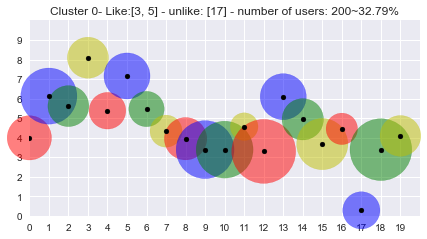

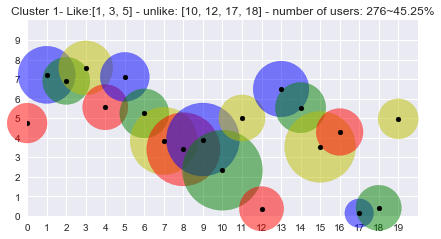

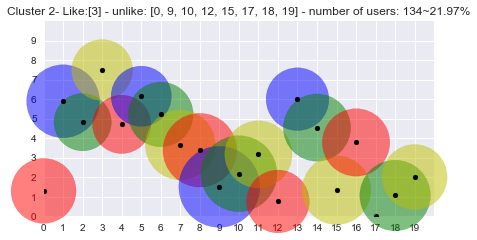

[200, 276, 134]
this is information with the number of clusters is  4


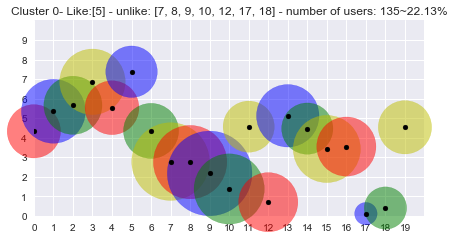

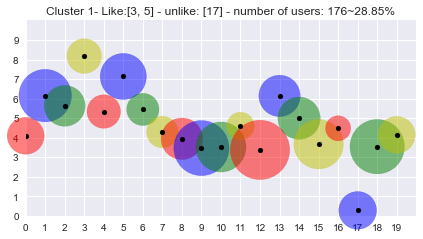

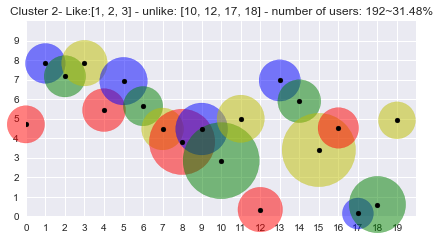

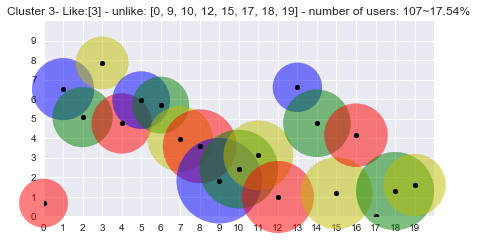

[135, 176, 192, 107]
this is information with the number of clusters is  5


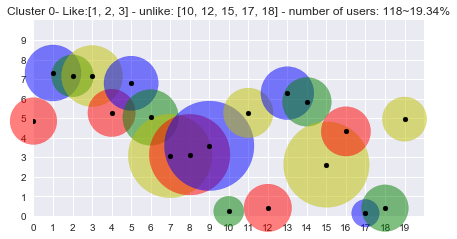

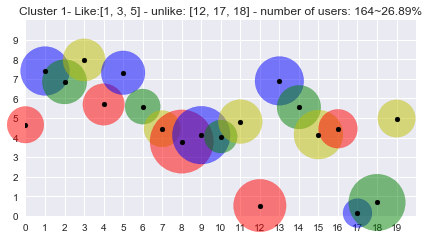

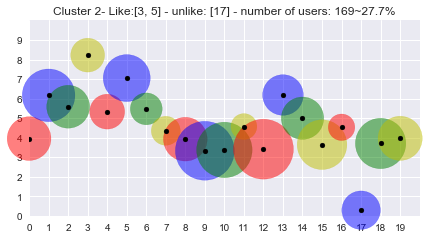

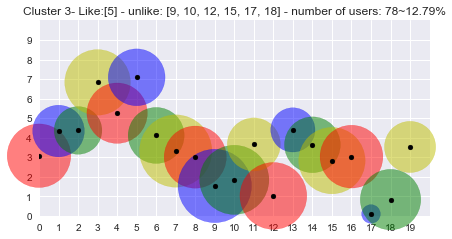

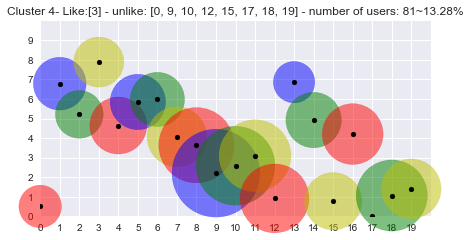

[118, 164, 169, 78, 81]
this is information with the number of clusters is  6


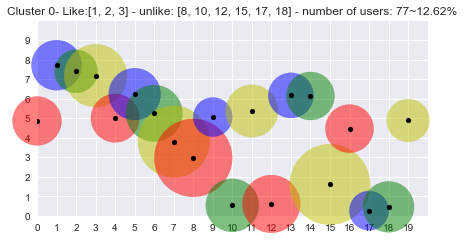

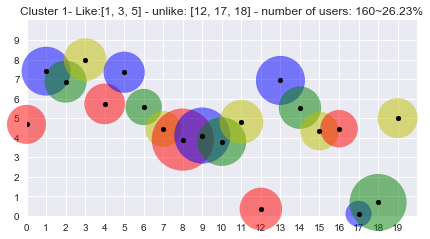

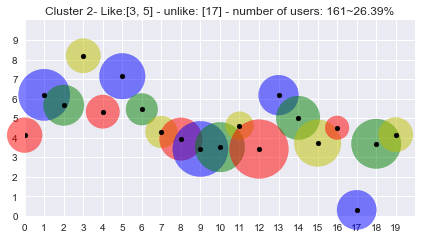

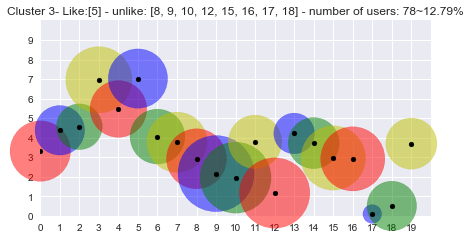

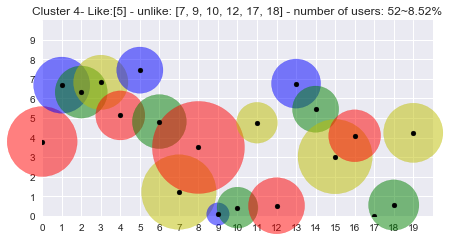

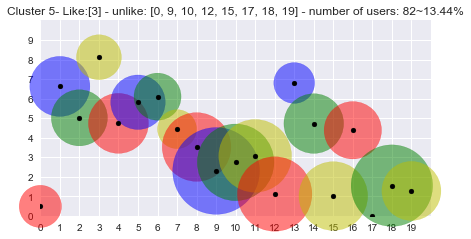

[77, 160, 161, 78, 52, 82]
this is information with the number of clusters is  7


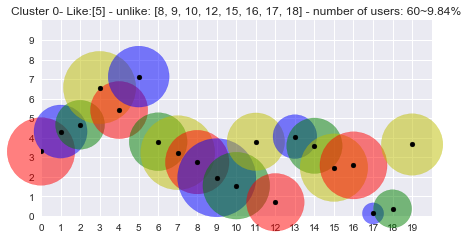

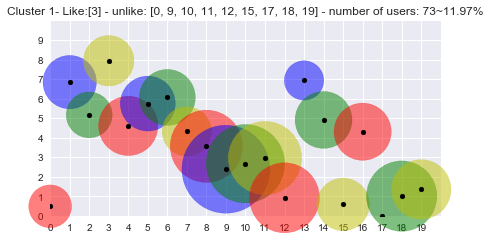

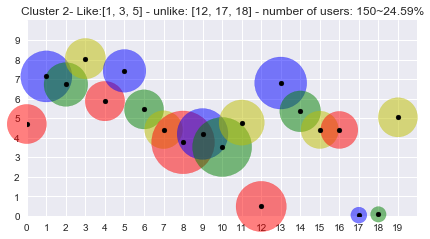

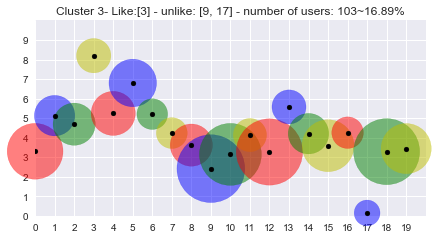

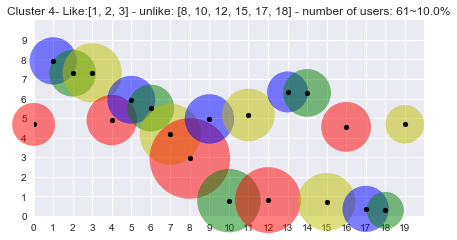

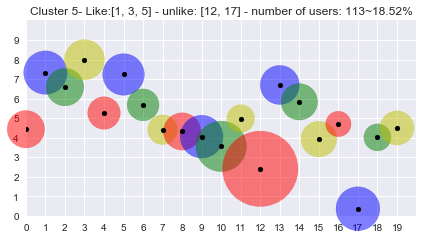

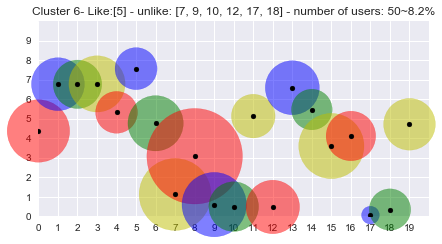

[60, 73, 150, 103, 61, 113, 50]
this is information with the number of clusters is  8


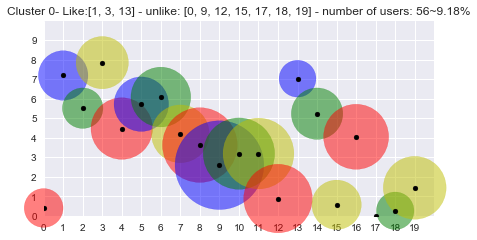

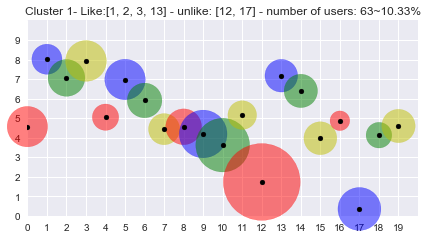

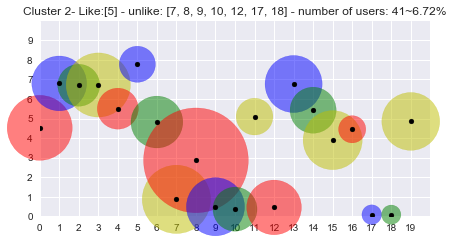

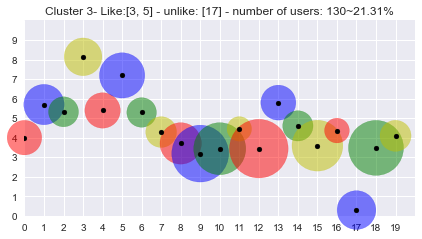

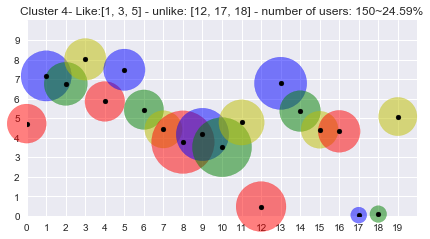

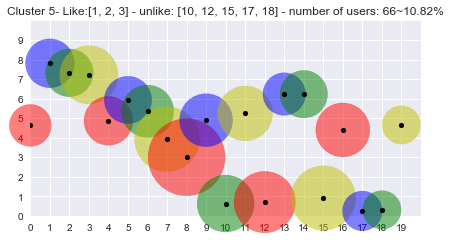

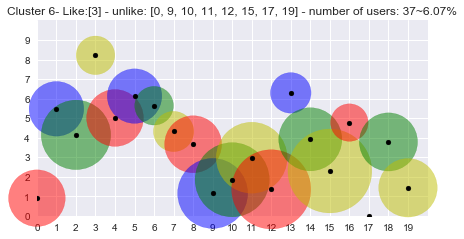

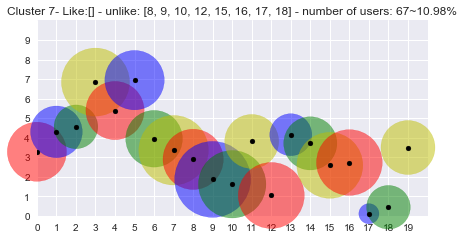

[56, 63, 41, 130, 150, 66, 37, 67]
this is information with the number of clusters is  9


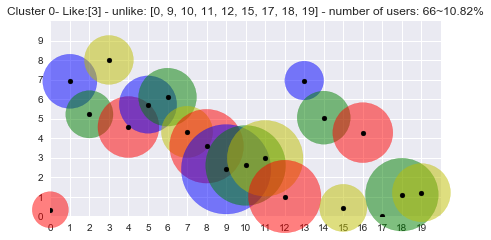

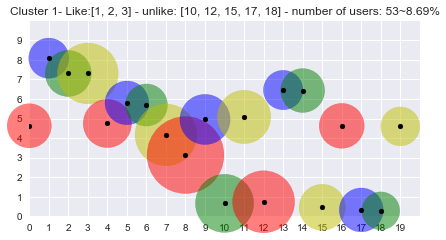

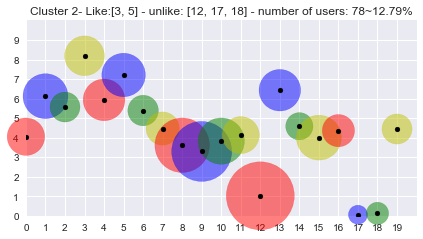

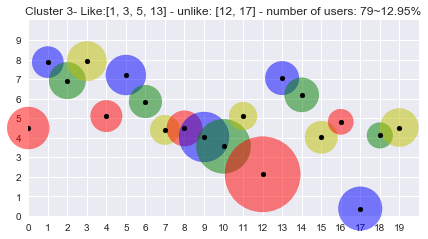

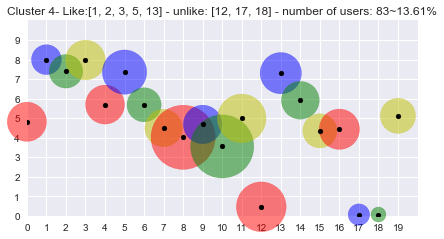

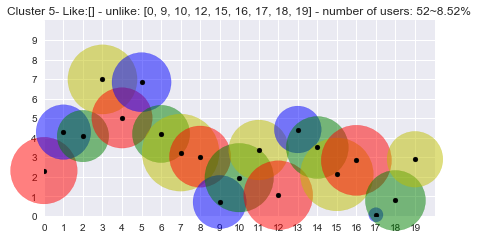

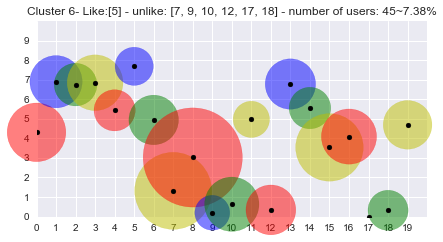

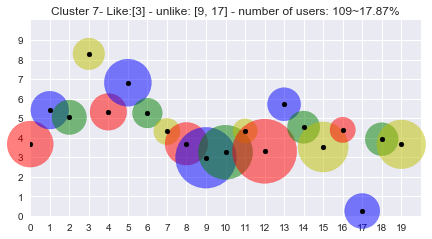

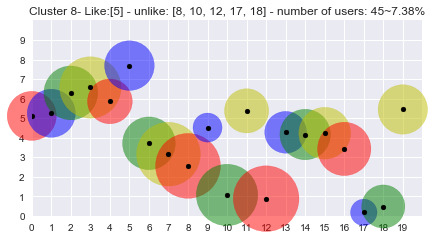

[66, 53, 78, 79, 83, 52, 45, 109, 45]
this is information with the number of clusters is  10


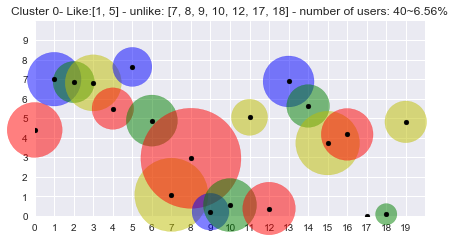

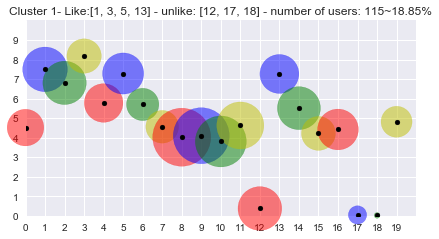

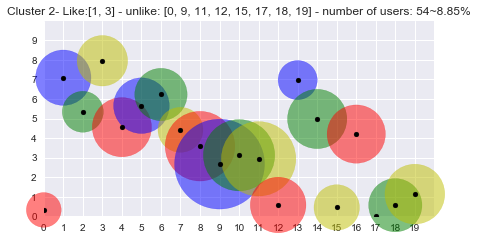

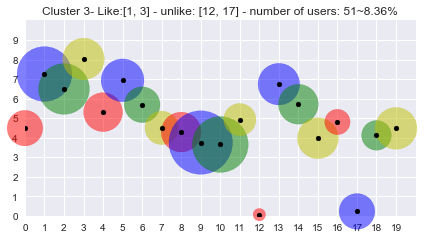

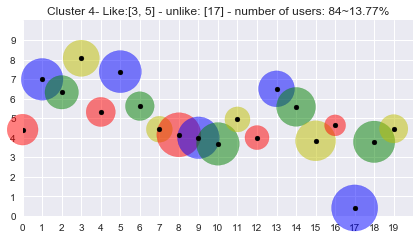

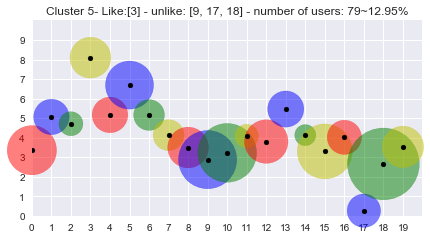

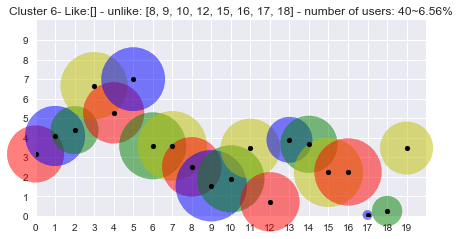

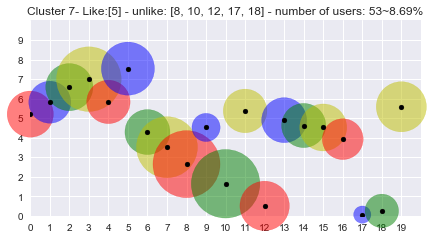

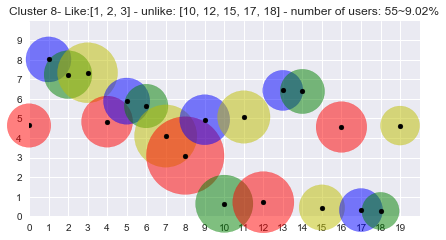

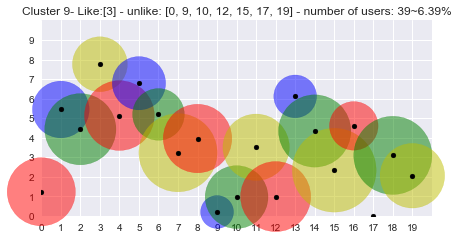

[40, 115, 54, 51, 84, 79, 40, 53, 55, 39]


Number_Cluster  Weighted_sum_standard_top_clus
0               3                      628.708492
1               4                      606.530327
2               5                      623.075698
3               6                      650.443517
4               7                      637.661071
5               8                      634.395999
6               9                      616.536026
7              10                      665.525748

In [20]:
dct={}
for i in range(3,11):
    value_obj_func=choose_nber_clus(i)
    dct[i]=value_obj_func
lst_nber_cluster=list(dct.keys())
lst_value_obj=[dct[k] for k in lst_nber_cluster]
data = {'Number_Cluster':lst_nber_cluster,
        'Weighted_sum_standard_top_clus': lst_value_obj } 
df_tuning_clus = pd.DataFrame(data) 
df_tuning_clus

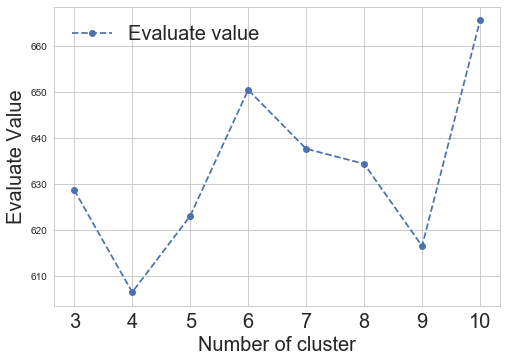

<Figure size 576x396 with 0 Axes>

In [22]:
plt.style.use('seaborn-whitegrid')
lst_value_evaluate=df_tuning_clus['Weighted_sum_standard_top_clus'].values.tolist()
plt.plot([i for i in range(3,11)],lst_value_evaluate,'o--',label='Evaluate value')
plt.xlabel('Number of cluster',fontsize=20)
plt.ylabel('Evaluate Value',fontsize=20)
#plt.yticks([i for i in range(3,11)],fontsize=20 )
plt.xticks([i for i in range(3,11)],fontsize=20 )
#plt.text(1.5,3.3,'Not care line',size=20)
#plt.text(9,7.3,'Care line',size=20)
plt.legend(loc=2, prop={'size': 20})
plt.show()
plt.savefig("cluster_evaluate.png")

In [23]:
matrix_input_MF=pd.read_csv('input_MF.csv')
matrix_input_MF.head()
matrix_input_MF=matrix_input_MF.fillna(0.0)

In [24]:
matrix_input_MF.head()

1    2    3    4    5    6    7    8    9   10  ...  193565  193567  \
0  4.0  0.0  4.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   
4  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   

   193571  193573  193579  193581  193583  193585  193587  193609  
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  

[5 rows x 9724 columns]

In [25]:
simulator_matrix=pd.read_csv('100_loops.csv')

In [26]:
simulator_matrix.columns=matrix_input_MF.columns

In [27]:
simulator_matrix.head()

1    2    3    4    5    6    7    8    9   10  ...  193565  193567  \
0  4.0  3.0  4.0  3.0  4.0  4.0  4.0  4.0  4.0  5.0  ...     4.0     4.0   
1  4.0  4.0  3.0  3.0  4.0  4.0  3.0  3.0  3.0  4.0  ...     4.0     4.0   
2  3.0  3.0  2.0  1.0  2.0  3.0  3.0  3.0  2.0  3.0  ...     3.0     2.0   
3  4.0  5.0  3.0  2.0  3.0  3.0  3.0  3.0  3.0  3.0  ...     3.0     3.0   
4  4.0  3.0  4.0  2.0  3.0  4.0  4.0  3.0  3.0  4.0  ...     4.0     3.0   

   193571  193573  193579  193581  193583  193585  193587  193609  
0     4.0     4.0     4.0     4.0     4.0     4.0     4.0     4.0  
1     4.0     4.0     4.0     4.0     4.0     4.0     4.0     4.0  
2     3.0     3.0     2.0     3.0     2.0     3.0     3.0     3.0  
3     3.0     3.0     3.0     3.0     3.0     3.0     3.0     3.0  
4     4.0     4.0     3.0     4.0     3.0     3.0     4.0     4.0  

[5 rows x 9724 columns]

In [28]:
def lst_movie_not_seen_high_rating(userid,ori_ratings,MF):
    lst_movieid=list(ori_ratings.columns)#tra ve
    #print(lst_movieid)
    personal_ratings=list(ori_ratings.loc[userid])
    #print(personal_ratings)
    lst_index_zeros=[index for index, value in enumerate(personal_ratings) if value == 0]
    #print("lst_index_zeros:",lst_index_zeros)
    lst_movieid_not_seen=set([lst_movieid[i] for i in lst_index_zeros])
    #print(lst_movieid_not_seen)
    #print('2' in lst_movieid_not_seen)
    personal_ratings_simulator=list(MF.loc[userid])
    #print(personal_ratings_simulator)
    lst_index_high_ratings=[index for index, value in enumerate(personal_ratings_simulator) if value >= 4]
    #rint(4 in lst_index_high_ratings)
    #rint(lst_index_high_ratings)
    lst_movieid_high_ratings=set([lst_movieid[i] for i in lst_index_high_ratings])
    #print(lst_movieid_high_ratings)
    res=lst_movieid_not_seen & lst_movieid_high_ratings
    return res

In [137]:
df=pd.read_csv('interaction_main.csv')
df.head()

userId  movieId  rating             genres
0       1        1     4.0  [2, 0, 19, 5, 11]
1       5        1     4.0  [2, 0, 19, 5, 11]
2       7        1     4.5  [2, 0, 19, 5, 11]
3      15        1     2.5  [2, 0, 19, 5, 11]
4      17        1     4.5  [2, 0, 19, 5, 11]

In [30]:
def get_lst_cate_movie(movieId,df):
    lst_movieId=df['movieId'].values.tolist()
    lst_cate=df['genres'].values.tolist()
    if movieId not in lst_movieId:
        return []
    index=lst_movieId.index(movieId)
    cate=lst_cate[index]
    lst_cate_real=str_lst_to_lst(cate)
    return lst_cate_real

In [31]:
def count_percentage(total_set_movieId,lst_cate_check,df):
    total_lst_movieId=list(total_set_movieId)
    count=0
    total_lst_cate=[get_lst_cate_movie(int(movieId),df) for movieId in total_lst_movieId]
    for lst_cate in total_lst_cate:
        if len(set(lst_cate) & set(lst_cate_check))>0:
            count=count+1
    return count/len(total_lst_movieId)*100

In [32]:
def get_total_set_movieId(lst_user,df,ori_ratings,MF):
    lst_set_movieId=[lst_movie_not_seen_high_rating(i,matrix_input_MF,simulator_matrix) for i in lst_user]
    set_final=set()
    for set_movieId in lst_set_movieId:
        set_final=set_final | set_movieId
    return set_final

In [33]:
def count_percentage_all_cluster(df,ori_ratings,MF,total_user_clus,lst_lst_like):
    count_percentage_all_cluster=[]
    for i in range(len(total_user_clus)):
        check=get_total_set_movieId(total_user_clus[i],df,matrix_input_MF,simulator_matrix)
        count_percentage_all_cluster.append(count_percentage(check,lst_lst_like[i],df))
    data = {'No of cluter':[i for i in range(len(total_user_clus))],
        'Percentage': count_percentage_all_cluster } 
    df = pd.DataFrame(data) 
    return df

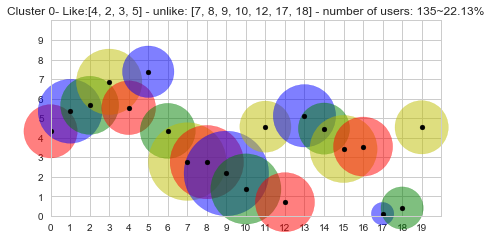

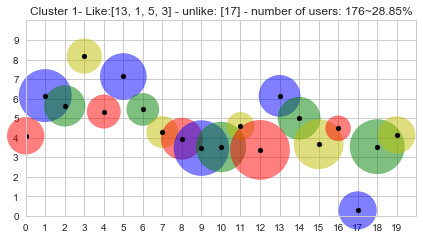

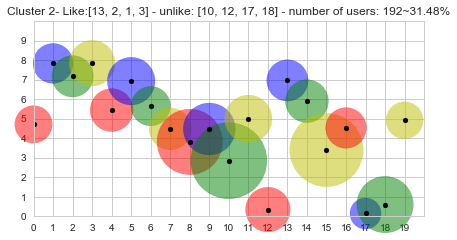

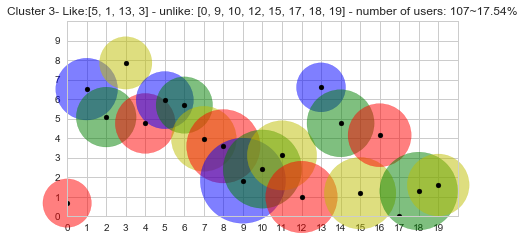

In [136]:
nber_clus=4
kmeans = KMeans(n_clusters=nber_clus, random_state=0).fit(matrix_user)
lst_label=list(kmeans.labels_)
lst_nber_users=[]
lst_avg=[]
total_user_clus=[0 for i in range(nber_clus)]
lst_lst_like=[0 for i in range(nber_clus)]
for i in range(nber_clus):
    nber_users,avg,lst_lst_like[i],lst_unlike,total_user_clus[i]=Information_clustering(i,lst_label)#de show thong tin tung cum thi la ham information_clustering()
    lst_nber_users.append(nber_users)
    lst_avg.append(avg)
#print("Object function (need to minimize): ",np.sum(np.array(lst_nber_users)*np.array(lst_avg)))
centroids = kmeans.cluster_centers_
#print("centroids:",centroids)
#print("avg_like",lst_avg)

In [ ]:
df=pd.read_csv('interaction_main.csv')
df1=count_percentage_all_cluster(df,matrix_input_MF,simulator_matrix,total_user_clus,lst_lst_like)
lst_top4=df1.Percentage.values.tolist()

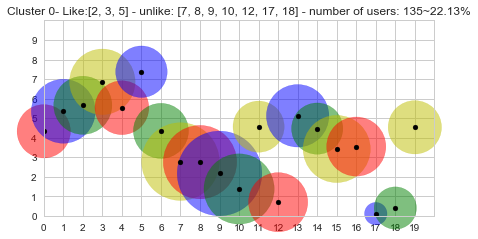

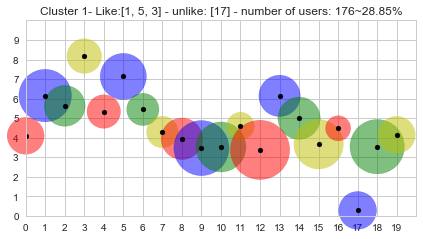

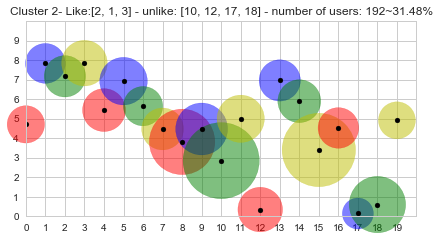

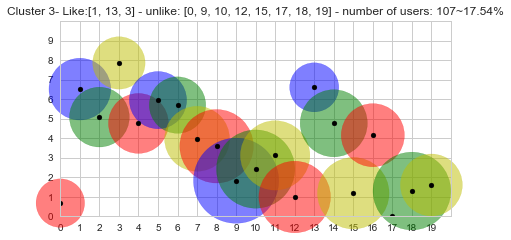

In [139]:
nber_clus=4
kmeans = KMeans(n_clusters=nber_clus, random_state=0).fit(matrix_user)
lst_label=list(kmeans.labels_)
lst_nber_users=[]
lst_avg=[]
total_user_clus=[0 for i in range(nber_clus)]
lst_lst_like=[0 for i in range(nber_clus)]
for i in range(nber_clus):
    nber_users,avg,lst_lst_like[i],lst_unlike,total_user_clus[i]=Information_clustering2(i,lst_label)#de show thong tin tung cum thi la ham information_clustering()
    lst_nber_users.append(nber_users)
    lst_avg.append(avg)
#print("Object function (need to minimize): ",np.sum(np.array(lst_nber_users)*np.array(lst_avg)))
centroids = kmeans.cluster_centers_
#print("centroids:",centroids)
#print("avg_like",lst_avg)

In [140]:
df=pd.read_csv('interaction_main.csv')
df1=count_percentage_all_cluster(df,matrix_input_MF,simulator_matrix,total_user_clus,lst_lst_like)
lst_top3=df1.Percentage.values.tolist()

In [45]:
lst_avg_top4=[6.357398914243679, 6.9019671148416535, 7.458781896641247, 6.733987274323267]
lst_avg_top3=[6.63195116727859, 7.155697379135664, 7.622868216864979, 6.993898649106139]

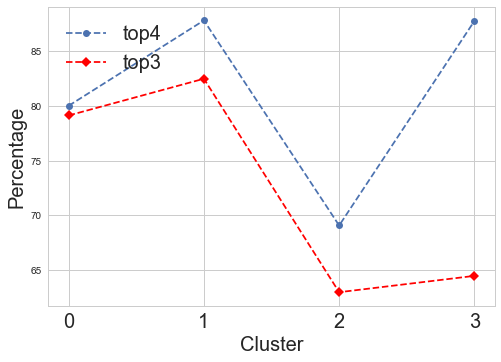

In [141]:
plt.plot([i for i in range(4)],lst_top4,'o--',label='top4')
plt.plot([i for i in range(4)],lst_top3,'D--',c='red',label='top3')
plt.xlabel('Cluster',fontsize=20)
plt.ylabel('Percentage',fontsize=20)
#plt.yticks([i for i in range(3,11)],fontsize=20 )
plt.xticks([i for i in range(4)],fontsize=20 )
#plt.text(1.5,3.3,'Not care line',size=20)
#plt.text(9,7.3,'Care line',size=20)
plt.legend(loc=2, prop={'size': 20})
plt.show()
#plt.savefig("cluster_simulator.png")

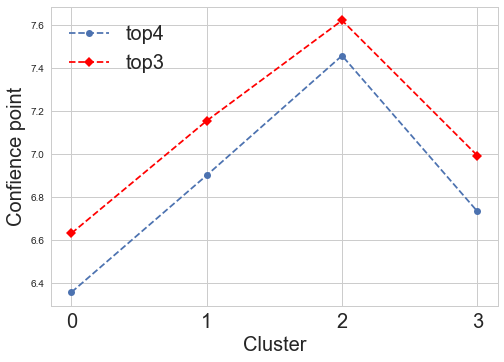

In [46]:

plt.plot([i for i in range(4)],lst_avg_top4,'o--',label='top4')
plt.plot([i for i in range(4)],lst_avg_top3,'D--',c='red',label='top3')
plt.xlabel('Cluster',fontsize=20)
plt.ylabel('Confience point',fontsize=20)
#plt.yticks([i for i in range(3,11)],fontsize=20 )
plt.xticks([i for i in range(4)],fontsize=20 )
#plt.text(1.5,3.3,'Not care line',size=20)
#plt.text(9,7.3,'Care line',size=20)
plt.legend(loc=2, prop={'size': 20})
plt.show()
#plt.savefig("cluster_simulator_confidence.png")

In [47]:
def get_ratings_each_cluster(lst_id,dct_ratings_user):
    count=0
    for i in lst_id:
        count=count+dct_ratings_user[i+1]
    return count

In [51]:
lst_ratings_4cluster=[get_ratings_each_cluster(total_user_clus[i],dct_ratings_user) for i in range(4)]

In [52]:
lst_ratings_4cluster=[lst_ratings_4cluster[i]/100836 for i in range(4)]

In [53]:
lst_nber_user_4cluster=[len(total_user_clus[i]) for i in range(4)]

In [54]:
lst_nber_user_4cluster=[lst_nber_user_4cluster[i]/610*100 for i in range(4)]

In [55]:
lst_cluster_0=[dct_ratings_user[i+1] for i in total_user_clus[0]]
lst_cluster_1=[dct_ratings_user[i+1] for i in total_user_clus[1]]
lst_cluster_2=[dct_ratings_user[i+1] for i in total_user_clus[2]]
lst_cluster_3=[dct_ratings_user[i+1] for i in total_user_clus[3]]

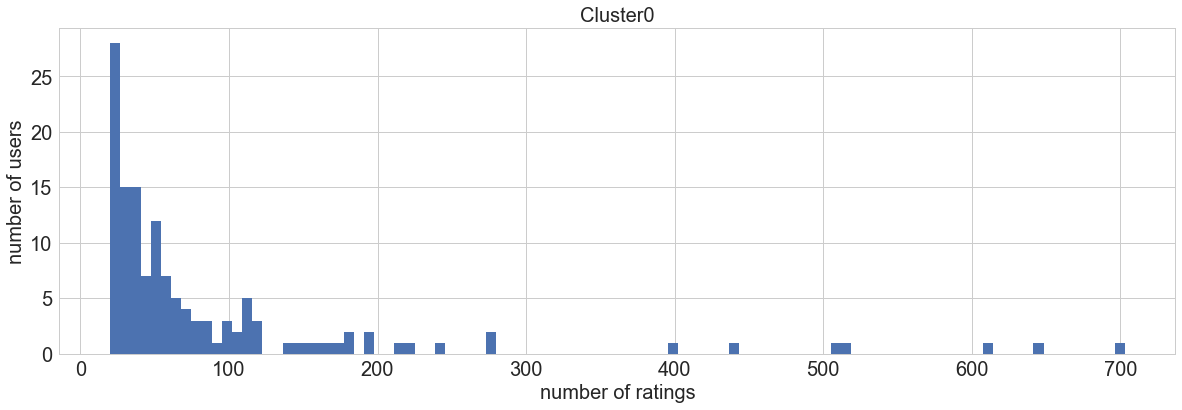

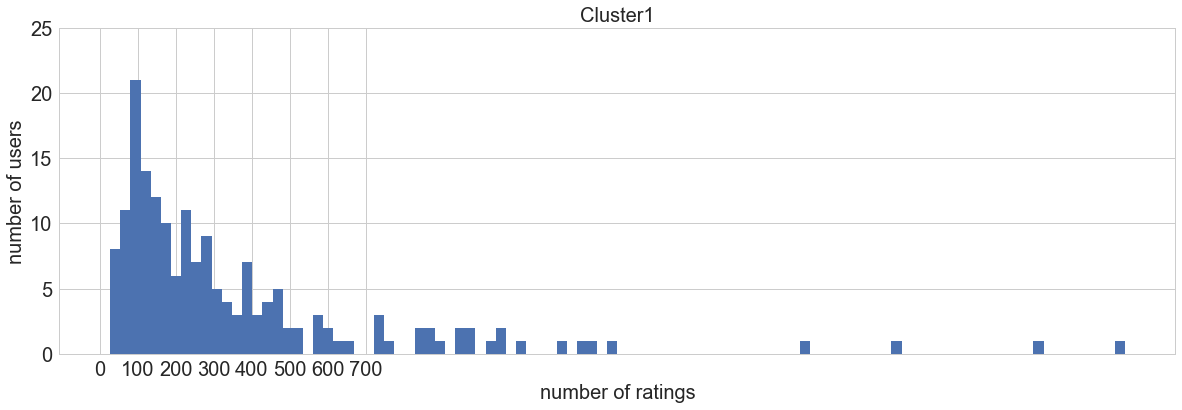

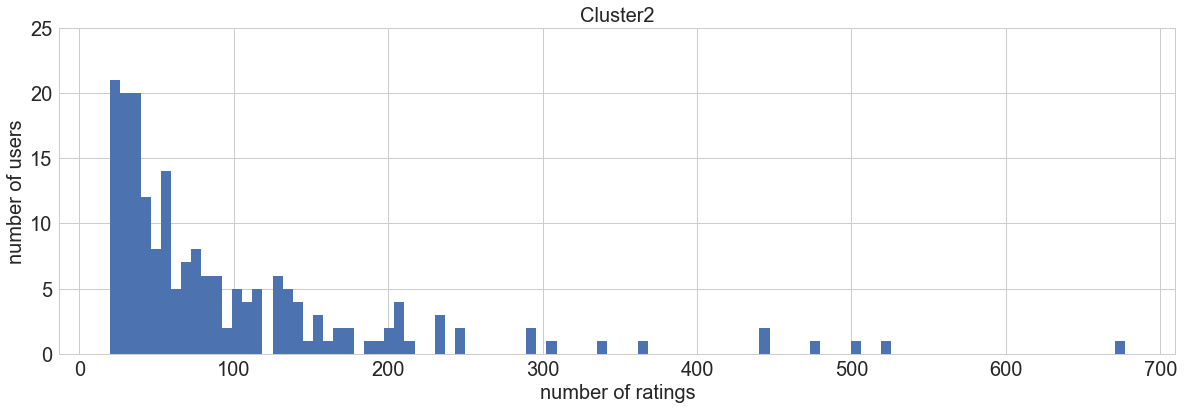

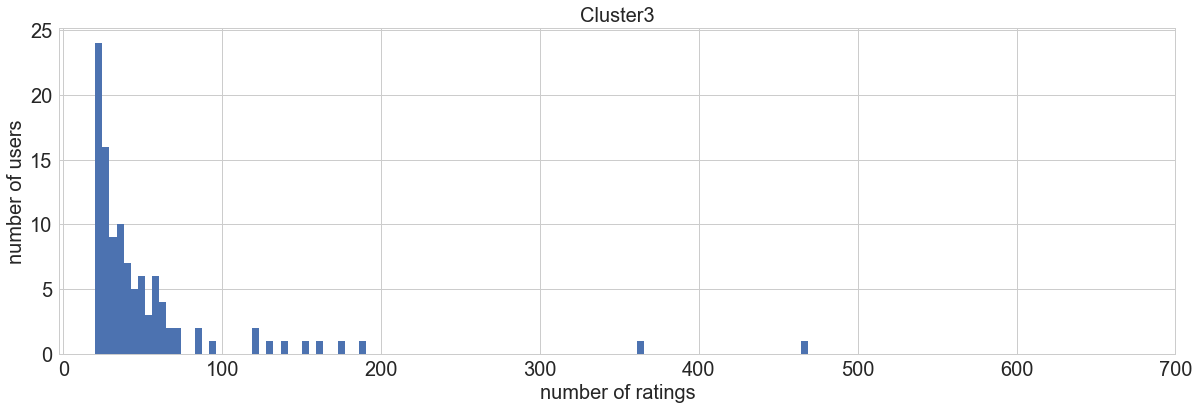

In [56]:
lst_cluster_total=[lst_cluster_0,lst_cluster_1,lst_cluster_2,lst_cluster_3]
for i in range(4):
# Creating a dictionary to store data
    data = {'Cluster':lst_cluster_total[i]} 
 
# Creating DataFrame 
    df21 = pd.DataFrame(data) 
    
    plt.figure(figsize=[20,6])
    df21['Cluster'].hist(bins=100)
    plt.xlabel('number of ratings',fontsize=20)
    plt.ylabel('number of users',fontsize=20)
    plt.yticks([5*i for i in range(6)],fontsize=20)
    plt.xticks([100*i for i in range(8)],fontsize=20)
    plt.title("Cluster"+str(i),fontsize=20)
    plt.savefig("Cluster_ratings_"+str(i)+".png")
    plt.show()
    

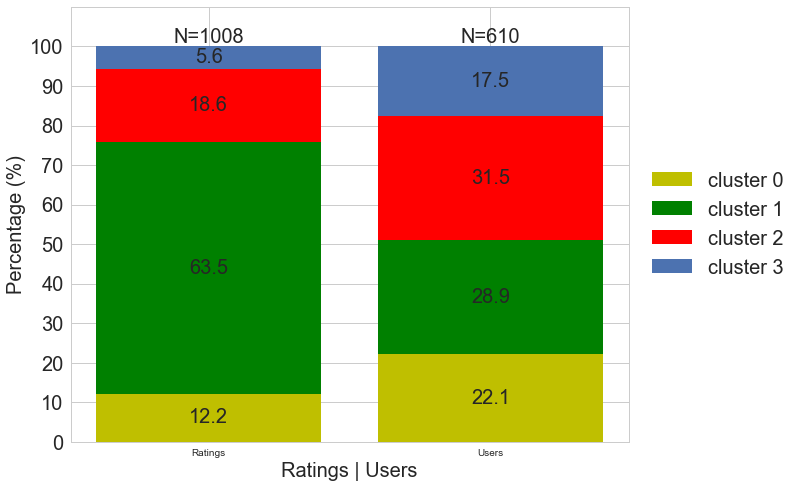

In [57]:
x = ["Ratings","Users"]
y1 = np.array([lst_ratings_4cluster[0]*100836/100,lst_nber_user_4cluster[0]*610/100])
y2 = np.array([lst_ratings_4cluster[1]*100836/100,lst_nber_user_4cluster[1]*610/100])
y3 = np.array([lst_ratings_4cluster[2]*100836/100,lst_nber_user_4cluster[2]*610/100])
y4 = np.array([lst_ratings_4cluster[3]*100836/100,lst_nber_user_4cluster[3]*610/100])
# memo of sample number
snum = (y1+y2+y3+y4)

# normalization
y1 = y1/snum*100.
y2 = y2/snum*100.
y3 = y3/snum*100.
y4=y4/snum*100.
plt.figure(figsize=(10,8))

# stack bars
plt.bar(x, y1, label='cluster 0',color='y',capsize=20)
plt.bar(x, y2 ,bottom=y1,label='cluster 1',color='g')
plt.bar(x, y3 ,bottom=y1+y2,label='cluster 2',color='r')
plt.bar(x, y4 ,bottom=y1+y2+y3,label='cluster 3')
plt.xlabel('Ratings | Users',fontsize=20)
# add text annotation corresponding to the percentage of each data.
for xpos, ypos, yval in zip(x, y1/2, y1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center",fontsize=20)
for xpos, ypos, yval in zip(x, y1+y2/2, y2):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center",fontsize=20)
for xpos, ypos, yval in zip(x, y1+y2+y3/2, y3):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center",fontsize=20)
# add text annotation corresponding to the "total" value of each bar
for xpos, ypos, yval in zip(x, y1+y2+y3+y4/2, y4):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center",fontsize=20)
for xpos, ypos, yval in zip(x, y1+y2+y3+y4, snum):
    plt.text(xpos, ypos, "N=%d"%yval, ha="center", va="bottom",fontsize=20)

plt.ylim(0,110)
plt.yticks([10*i for i in range(11)],fontsize=20)
plt.ylabel("Percentage (%)",fontsize=20)
plt.legend(bbox_to_anchor=(1.01,0.5), loc='center left',prop={'size': 20})
plt.savefig('normalized_stacked_barplot_with_number.png', bbox_inches='tight', pad_inches=0.02)

# Movie

In [2]:
df_vector_movie=pd.read_csv('vector_movies.csv')

In [3]:
lst_movieid=df_vector_movie['movieId'].values.tolist()

In [4]:
lst_movieId=df_vector_movie.pop('movieId')

In [5]:
for i in range(20):
    df_vector_movie.pop(str(i))

In [6]:
lst_vector_all_movies=df_vector_movie.values.tolist()

In [7]:
lst_ave_ratings=df_vector_movie['average_rating'].values.tolist()
lst_nber_rating=df_vector_movie['scale_ratings_to329*5'].values.tolist()

In [22]:
from sklearn.cluster import KMeans
import numpy as np

#kmeans = KMeans(n_clusters=7, random_state=0).fit(lst_vector_all_movies)
kmeans = KMeans(n_clusters=7, random_state=0).fit(df1)
labels=list(kmeans.labels_)
df1=np.array(lst_vector_all_movies)

In [18]:
print(np.unique(kmeans))

[KMeans(n_clusters=7, random_state=0)]


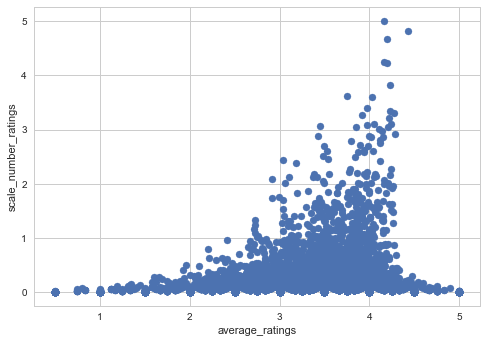

In [157]:
plt.scatter(df1[: , 0] , df1[: , 1] )
plt.xlabel('average_ratings')
plt.ylabel('scale_number_ratings')
plt.show()

In [14]:
u_labels

array([0, 1, 2, 3, 4, 5, 6])

[5 6 5 ... 1 6 6]


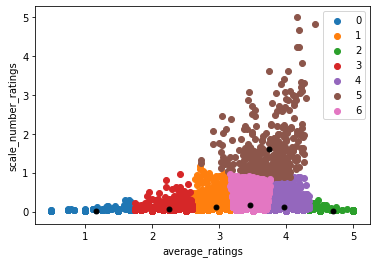

In [26]:
#Initialize the class object
kmeans = KMeans(n_clusters= 7)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df1)
print(label)
centroids = kmeans.cluster_centers_
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df1[label == i , 0] , df1[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 24, color = 'k')
plt.xlabel('average_ratings')
plt.ylabel('scale_number_ratings')
plt.legend()
plt.show()

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



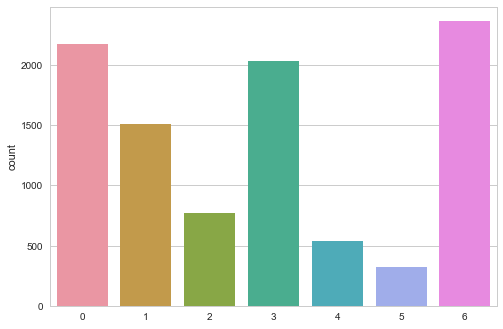

In [159]:
import seaborn as sns
sns.countplot(label)

In [160]:
df_check_cate_final=pd.read_csv('df_check_cate_final.csv')

In [161]:
lst_temp_thoi=list(df_check_cate_final.genres)
df_check_cate_final.genres=[str_lst_to_lst(i) for i in lst_temp_thoi]

In [162]:
df_check_cate_final.genres[0]#check xem la list hay string

[2, 0, 19, 5, 11]

In [163]:
lst_movieId_1212PM=df_check_cate_final.movieId.values.tolist()
lst_cate_1213PM=df_check_cate_final.genres.values.tolist()

In [164]:
lst_1=lst_movieid

In [165]:
from collections import Counter 

In [166]:
def count_nber_genres_each_cluster(nber_cluster,label):
    index_cum1=[index for index, value in enumerate(label) if value == nber_cluster]
    lst_id_movie_clus_1=[lst_1[i] for i in index_cum1]
    lst_index=[lst_movieId_1212PM.index(i) for i in lst_id_movie_clus_1]
    #print("lst_index",lst_index)
    lst_cate=[lst_cate_1213PM[i] for i in lst_index]
    
    flat_list = [item for sublist in lst_cate for item in sublist]
    res=(Counter(flat_list)).most_common()
    return res,len(index_cum1)

In [167]:
for i in range(7):
    print("thong tin genres cua cum ",i)
    
    print(count_nber_genres_each_cluster(i,labels))

thong tin genres cua cum  0
([(3, 1204), (5, 616), (4, 363), (13, 331), (1, 252), (6, 246), (12, 188), (2, 183), (14, 146), (8, 132), (11, 131), (0, 131), (16, 129), (7, 122), (19, 79), (15, 72), (10, 44), (18, 39), (9, 14), (17, 6)], 2063)
thong tin genres cua cum  1
([(5, 598), (3, 386), (1, 285), (13, 277), (4, 186), (2, 177), (8, 161), (6, 153), (14, 144), (11, 115), (19, 99), (0, 54), (16, 54), (15, 30), (7, 25), (10, 20), (9, 19), (12, 13), (17, 6), (18, 5)], 1217)
thong tin genres cua cum  2
([(2, 19), (1, 19), (3, 17), (13, 16), (5, 10), (14, 10), (6, 9), (16, 6), (11, 5), (4, 5), (0, 4), (19, 4), (7, 4), (9, 3), (8, 2), (15, 2), (10, 1)], 43)
thong tin genres cua cum  3
([(5, 401), (3, 255), (1, 187), (13, 185), (8, 152), (2, 107), (14, 96), (4, 95), (6, 91), (19, 85), (11, 67), (16, 43), (0, 42), (15, 27), (7, 20), (12, 10), (10, 8), (9, 5), (17, 3), (18, 1)], 877)
thong tin genres cua cum  4
([(3, 1030), (5, 721), (13, 378), (4, 348), (1, 337), (6, 256), (2, 237), (14, 157),

In [168]:
df_ratings=pd.read_csv('ratings.csv')

In [169]:
df_vector_movie=pd.read_csv('phancum3D.csv')

In [170]:
lst_timestamp=df_ratings['timestamp'].values.tolist()

In [171]:
df_ratings=pd.read_csv('ratings.csv')
def get_timestemp(movieId,df_ratings):
    lst_timestamp=df_ratings['timestamp'].values.tolist()
    lst_movieId=df_ratings['movieId'].values.tolist()
    if movieId not in lst_movieId:
        return 0
    lst_index=[index for index, value in enumerate(lst_movieId) if value == movieId]
    #can res la min trong timestamp chu k phai index vi co the k sap xep theo thoi gian
    lst_new_time=[lst_timestamp[i] for i in lst_index]
    res=min(lst_new_time)
    
    
    #a=min(lst_timestamp)#tuc la tu lau roi oldest
    b=max(lst_timestamp)#tuc la moi nhat newest
    resu=(b-res)/(24*3600*365*6)
    return resu#cang nho tuc duoc cong bo cang gan day

In [172]:
lst_timestamp=[get_timestemp(i,df_ratings) for i in lst_movieid]

In [173]:
lst_timestamp[0:10]

[3.7442759069000506,
 3.6914519860899713,
 3.7419638984018264,
 3.7419581430745814,
 3.7419581430745814,
 3.7304409933620835,
 3.1574395347116524,
 3.7419581483595468,
 3.750605836715711,
 3.658930994207678]

In [174]:
df_vector_movie['time']=lst_timestamp

In [175]:
df_vector_movie_copy=df_vector_movie.copy()

In [176]:
if 'label' in df_vector_movie_copy.columns:
    df_vector_movie_copy.pop('label')

In [177]:
lst_vector_all_movies=df_vector_movie_copy.values.tolist()
df=np.array(lst_vector_all_movies)
df.shape

(9724, 3)

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:48: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



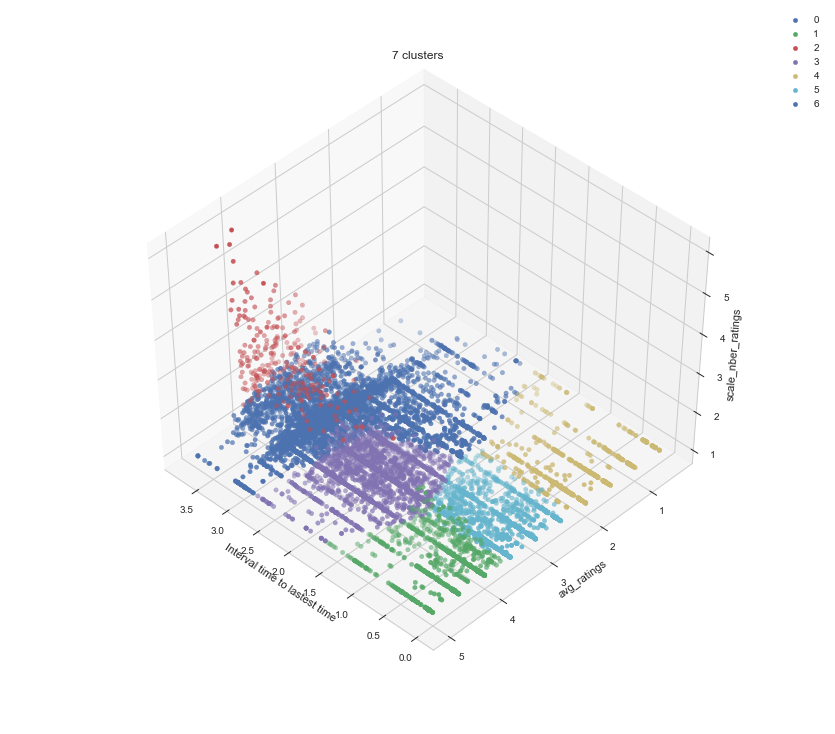

In [207]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans


np.random.seed(5)

X = df


estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['7 clusters', '3 clusters', '3 clusters, bad initialization']
name='k_means_iris_3'
est=KMeans(n_clusters=7)
if 1>0:
    fig = plt.figure(fignum, figsize=(12, 10))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    centroids = est.cluster_centers_
    labels = est.labels_
    u_labels = np.unique(labels)
    for  i in u_labels:
        ax.scatter(X[labels==i, 2], X[labels==i, 0], X[labels==i, 1],label=i)

    ax.w_xaxis.set_ticklabels([i/2-0.5 for i in range(10)])
    ax.w_yaxis.set_ticklabels([i for i in range(6)])
    ax.w_zaxis.set_ticklabels([i for i in range(6)])
    ax.set_xlabel('Interval time to lastest time')
    ax.set_ylabel('avg_ratings')
    ax.set_zlabel('scale_nber_ratings')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    ax.legend()
    fignum = fignum + 1
    fig.savefig("check.png")


fig.show()


c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



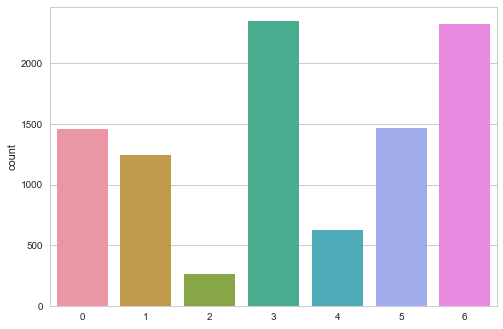

In [179]:
sns.countplot(labels)

In [180]:
list_label=list(labels)
df_vector_movie['label']=list_label
df_vector_movie

average_rating  scale_ratings_to329*5      time  label
0           3.920930               3.267477  3.744276      2
1           3.259615               0.790274  3.691452      6
2           3.946078               1.550152  3.741964      2
3           3.975369               3.085106  3.741958      2
4           4.237745               3.100304  3.741958      2
...              ...                    ...       ...    ...
9719        2.500000               0.015198  0.307868      5
9720        4.500000               0.015198  0.307872      1
9721        3.000000               0.015198  0.232298      5
9722        3.500000               0.015198  0.232277      5
9723        3.500000               0.015198  0.232269      5

[9724 rows x 4 columns]

In [181]:
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [208]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Average_Ratings -->'),yaxis = dict(title  = 'Scale_number_Ratings--->'),zaxis = dict(title  = 'Time-->'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
#labels = model.labels_
data=[]
colors=['yellow','red','blue','green','orange','purple','#D12B60']
for  i in u_labels:
    trace = go.Scatter3d(x=X[labels==i, 0], y=X[labels==i, 1], z=X[labels==i, 2], mode='markers',marker=dict(color = colors[6-i], size= 10, line=dict(color= 'black',width = 10)),name='Cluster '+str(i))
    data.append(trace)
trace12= go.Scatter3d(x=centroids[:, 0], y=centroids[:, 1], z=centroids[:, 2], mode='markers',marker=dict(color = 'white', size= 10, line=dict(color= 'black',width = 10)),name='Center points')
layout = go.Layout(showlegend=True,margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data.append(trace12)
fig = go.Figure(data = data, layout = layout)
fig.show()

In [183]:
def count_nber_genres_each_cluster2(nber_cluster,label):
    index_cum1=[index for index, value in enumerate(label) if value == nber_cluster]
    lst_id_movie_clus_1=[lst_1[i] for i in index_cum1]
    lst_index=[lst_movieId_1212PM.index(i) for i in lst_id_movie_clus_1]
    #print("lst_index",lst_index)
    lst_cate=[lst_cate_1213PM[i] for i in lst_index]
    str_lst_cate=[str(i) for i in lst_cate]
    #flat_list = [item for sublist in lst_cate for item in sublist]
    res=(Counter(str_lst_cate)).most_common()
    return res,len(index_cum1)

In [184]:
flat_list = [item for sublist in lst_cate_1213PM for item in sublist]
res1=(Counter(flat_list)).most_common()
dict_nber_each_cate=dict(res1)

In [185]:
print("Thu tu cac chieu: [average of ratings -  number of ratings (scaled) - interval time from public] ")
for i in range(7):
    print("thong tin genres cua cum ",i) 
    res=count_nber_genres_each_cluster(i,labels)
    print("+ centroid cua cum:",centroids[i])
    print("+ total cac  the loai phim:\n ",res[0])
    print("+ tong so luong phim:",res[1])
    print("+ top 5 the loai phim trong cum:", res[0][:5])
    print("+ percentage of each cate:", [round(res[0][i][1]/dict_nber_each_cate[res[0][i][0]]*100,2) for i in range(5)])
    print("-----------")

Thu tu cac chieu: [average of ratings -  number of ratings (scaled) - interval time from public] 
thong tin genres cua cum  0
+ centroid cua cum: [2.24006994 0.08481424 2.65972028]
+ total cac  the loai phim:
  [(5, 729), (3, 416), (1, 299), (13, 298), (8, 249), (4, 206), (2, 180), (14, 161), (6, 156), (19, 134), (11, 109), (16, 69), (15, 48), (0, 39), (7, 31), (10, 19), (12, 15), (9, 3), (18, 3)]
+ tong so luong phim: 1458
+ top 5 the loai phim trong cum: [(5, 729), (3, 416), (1, 299), (13, 298), (8, 249)]
+ percentage of each cate: [19.42, 9.57, 16.36, 15.78, 25.49]
-----------
thong tin genres cua cum  1
+ centroid cua cum: [4.28291003 0.05375256 0.43216113]
+ total cac  the loai phim:
  [(5, 517), (3, 486), (1, 189), (0, 177), (13, 171), (2, 161), (14, 145), (4, 145), (6, 133), (12, 127), (11, 110), (8, 108), (19, 91), (16, 67), (7, 52), (9, 20), (17, 17), (15, 16), (10, 13), (18, 8)]
+ tong so luong phim: 1246
+ top 5 the loai phim trong cum: [(5, 517), (3, 486), (1, 189), (0, 177

In [186]:
df_vector_movie['movieId']=lst_movieid
#df_vector_movie.to_csv("full_data_movies_11_40AM_2_6_2021.csv",index=False)

In [187]:
df_time_lastest_ratings=df_ratings.copy()

In [188]:
def get_time_lastest_rating(lst_time,movieId,lst_movieid_Rating):
    lst_index=[index for index, value in enumerate(lst_movieid_Rating) if value == movieId]
    lst_timestamp=[lst_time[i] for i in lst_index]
    last_timestamp=max(lst_timestamp)
    newest_time=max(lst_time)
    interval=(newest_time-last_timestamp)/(3600*24*6)
    return [interval,len(lst_index)]

In [189]:
def count_nber_genres_each_cluster3(nber_cluster,label):
    index_cum1=[index for index, value in enumerate(label) if value == nber_cluster]#cac index tuong ung voi lst id o duoi
    lst_id_movie_clus_1=[lst_1[i] for i in index_cum1]#bao gom cac id thuc cua movie
    lst_lastest_time_ratings=[get_time_lastest_rating(lst_time,i,lst_movieid_Ratings) for i in lst_id_movie_clus_1]
    lst_lastest_time=[i[0] for i in lst_lastest_time_ratings]
    lst_ratings_clus=[i[1] for i in lst_lastest_time_ratings]
    return lst_lastest_time,lst_id_movie_clus_1,lst_ratings_clus

In [190]:
lst_movieid_Ratings=df_time_lastest_ratings.movieId.values.tolist()
lst_time=df_time_lastest_ratings.timestamp.values.tolist()

In [191]:
lst_movieid_Ratings=df_time_lastest_ratings.movieId.values.tolist()
lst_time=df_time_lastest_ratings.timestamp.values.tolist()

In [192]:
a,b,c=count_nber_genres_each_cluster3(6,labels)

In [193]:
import pandas as pd 
 
# Creating a dictionary to store data
data = {'MovieId':b,
        'Last time rating': a ,
       'Number ratings in that cluster':c} 
 
# Creating DataFrame 
df2 = pd.DataFrame(data) 
 
# Print the dataframe
df2


MovieId  Last time rating  Number ratings in that cluster
0           3         75.798956                              52
1          70         13.814813                              55
2         101         24.135880                              23
3         151        222.142706                              44
4         157         35.763140                              11
...       ...               ...                             ...
2315      311       1361.339815                               1
2316      636       1361.339815                               1
2317      241       1105.429707                               1
2318     2737       1105.429441                               1
2319      137       1332.133866                               1

[2320 rows x 3 columns]

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 9 Text yticklabel objects>)

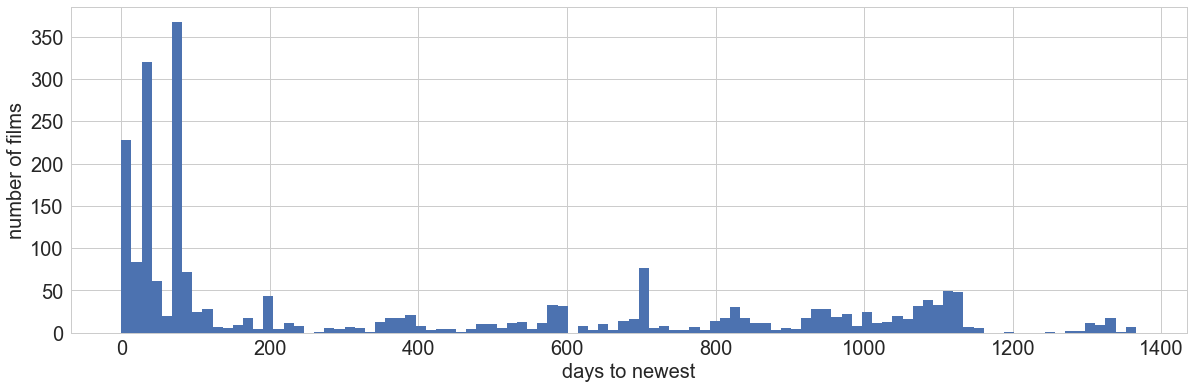

In [212]:
import seaborn as sns
plt.figure(figsize=[20,6])
df2['Last time rating'].hist(bins=100)
plt.xlabel('days to newest',fontsize=20)
plt.ylabel('number of films',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

Sum of raings: 34785


(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 10 Text yticklabel objects>)

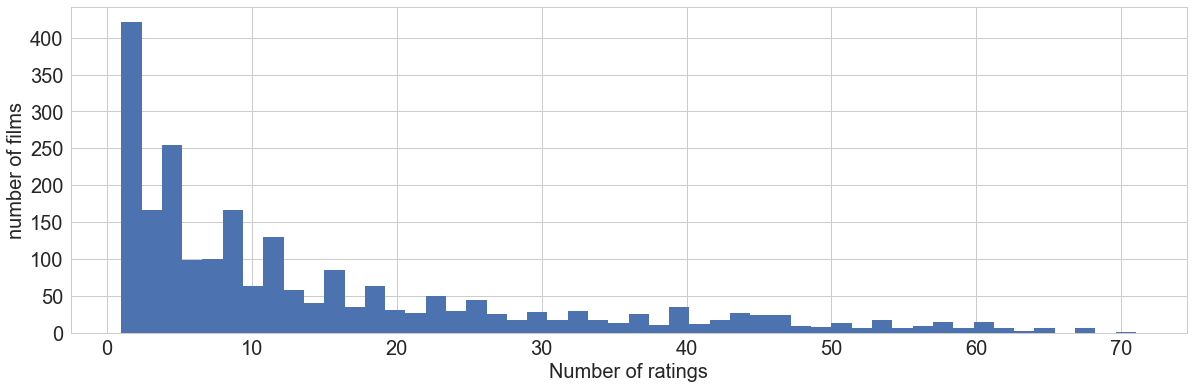

In [213]:
import seaborn as sns
plt.figure(figsize=[20,6])
df2['Number ratings in that cluster'].hist(bins=50)
print("Sum of raings:",np.sum(np.array(list(df2['Number ratings in that cluster']))))
plt.xlabel('Number of ratings',fontsize=20)
plt.ylabel('number of films',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

## ĐOẠN CHECK

In [196]:
df_vector_movie111=pd.read_csv('phancum3D.csv')

In [197]:
df_vector_movie111['time']=df_vector_movie111['time']*365

In [198]:
df_vector_movie111

average_rating  scale_ratings_to329*5         time
0           3.920930               3.267477  1104.970191
1           3.259615               0.790274  1104.973000
2           3.946078               1.550152  1104.971115
3           3.975369               3.085106  1104.968046
4           4.237745               3.100304  1104.969751
...              ...                    ...          ...
9719        2.500000               0.015198   112.371723
9720        4.500000               0.015198   112.373171
9721        3.000000               0.015198    84.788688
9722        3.500000               0.015198    84.780982
9723        3.500000               0.015198    84.778347

[9724 rows x 3 columns]

In [199]:
df_vector_movie_copy1=df_vector_movie111.copy()
lst_vector_all_movies1=df_vector_movie_copy1.values.tolist()
df11=np.array(lst_vector_all_movies1)
df11.shape

(9724, 3)

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:48: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



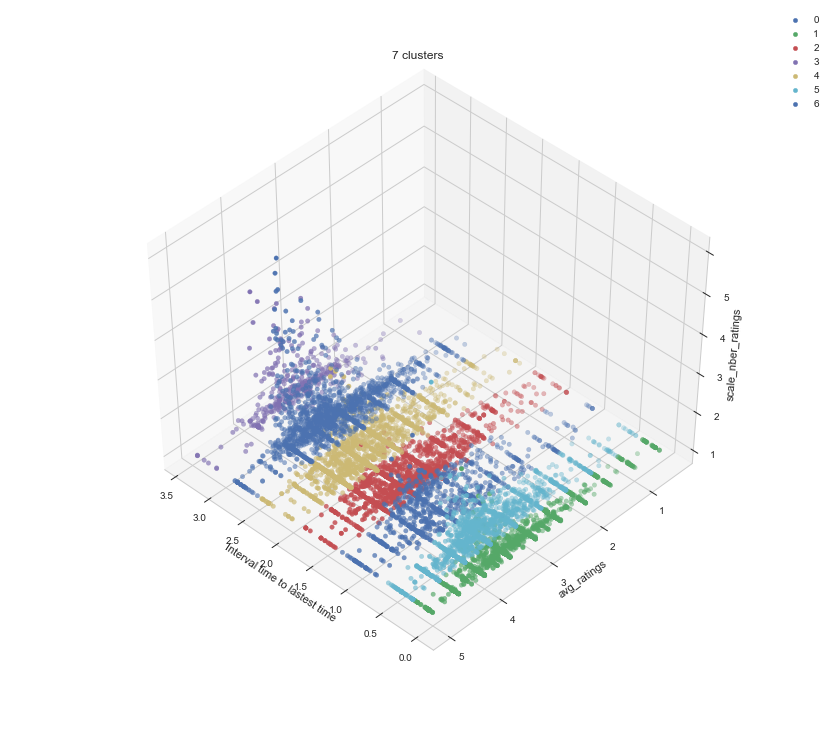

In [205]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans


np.random.seed(5)

X = df11


estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['7 clusters', '3 clusters', '3 clusters, bad initialization']
name='k_means_iris_3'
est=KMeans(n_clusters=7)
if 1>0:
    fig = plt.figure(fignum, figsize=(12, 10))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    centroids = est.cluster_centers_
    labels = est.labels_
    u_labels = np.unique(labels)
    for  i in u_labels:
        ax.scatter(X[labels==i, 2], X[labels==i, 0], X[labels==i, 1],label=i)

    ax.w_xaxis.set_ticklabels([i/2-0.5 for i in range(10)])
    ax.w_yaxis.set_ticklabels([i for i in range(6)])
    ax.w_zaxis.set_ticklabels([i for i in range(6)])
    ax.set_xlabel('Interval time to lastest time')
    ax.set_ylabel('avg_ratings')
    ax.set_zlabel('scale_nber_ratings')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    ax.legend()
    fignum = fignum + 1
    fig.savefig("check.png")


fig.show()


c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



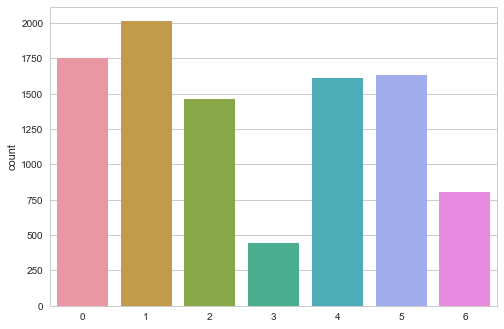

In [201]:
sns.countplot(labels)

In [202]:
list_label=list(labels)
df_vector_movie111['label']=list_label
df_vector_movie111

average_rating  scale_ratings_to329*5         time  label
0           3.920930               3.267477  1104.970191      0
1           3.259615               0.790274  1104.973000      0
2           3.946078               1.550152  1104.971115      0
3           3.975369               3.085106  1104.968046      0
4           4.237745               3.100304  1104.969751      0
...              ...                    ...          ...    ...
9719        2.500000               0.015198   112.371723      5
9720        4.500000               0.015198   112.373171      5
9721        3.000000               0.015198    84.788688      1
9722        3.500000               0.015198    84.780982      1
9723        3.500000               0.015198    84.778347      1

[9724 rows x 4 columns]

In [203]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Average_Ratings -->'),yaxis = dict(title  = 'Scale_number_Ratings--->'),zaxis = dict(title  = 'Time-->'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
#labels = model.labels_
data=[]
colors=['yellow','red','blue','green','orange','purple','#D12B60']
for  i in u_labels:
    trace = go.Scatter3d(x=X[labels==i, 0], y=X[labels==i, 1], z=X[labels==i, 2], mode='markers',marker=dict(color = colors[6-i], size= 10, line=dict(color= 'black',width = 10)),name='Cluster '+str(i))
    data.append(trace)
trace12= go.Scatter3d(x=centroids[:, 0], y=centroids[:, 1], z=centroids[:, 2], mode='markers',marker=dict(color = 'white', size= 10, line=dict(color= 'black',width = 10)),name='Center points')
layout = go.Layout(showlegend=True,margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data.append(trace12)
fig = go.Figure(data = data, layout = layout)
fig.show()

In [1]:
import numpy as np

In [3]:
a = np.arange(6).reshape(2,3) + 10
a

np.argmax(a)

np.argmax(a, axis=0)

np.argmax(a, axis=1)


array([2, 2], dtype=int64)

In [5]:
list(np.argmax(a, axis=1))

[2, 2]

In [8]:
np.max(a, axis=1)

array([12, 15])

In [9]:
a

array([[10, 11, 12],
       [13, 14, 15]])